In [210]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

# sklearn modules
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNNc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Chapter 4 exercises

## Conceptual

**1.** Using a little bit of algebra, prove that (4.2) is equivalent to (4.3). In other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

(4.2) The logistic function:
$$p(X) = \frac{{{e^{{\beta _0} + {\beta _1}x}}}}{{1 + {e^{{\beta _0} + {\beta _1}x}}}}$$

$$
\begin{array}{l}
1 - p(X) = 1 - \frac{{{e^{{\beta _0} + {\beta _1}x}}}}{{1 + {e^{{\beta _0} + {\beta _1}x}}}}\\
1 - p(X) = \frac{1}{{1 + {e^{{\beta _0} + {\beta _1}x}}}}\\
\frac{1}{{1 - p(X)}} = 1 + {e^{{\beta _0} + {\beta _1}x}}\\
\frac{{p(X)}}{{1 - p(X)}} = p(X) \times (1 + {e^{{\beta _0} + {\beta _1}x}})\\
\frac{{p(X)}}{{1 - p(X)}} = \frac{{{e^{{\beta _0} + {\beta _1}x}}}}{{1 + {e^{{\beta _0} + {\beta _1}x}}}} \times (1 + {e^{{\beta _0} + {\beta _1}x}})\\
\frac{{p(X)}}{{1 - p(X)}} = {e^{{\beta _0} + {\beta _1}x}}
\end{array}
$$

(4.3) The odds:
$$\frac{{p(X)}}{{1 - p(X)}} = {e^{{\beta _0} + {\beta _1}x}}$$

**2.** It was stated in the text that classifying an observation to the class for which (4.12) is largest is equivalent to classifying an observation to the class for which (4.13) is largest. Prove that this is the case. In other words, under the assumption that the observations in the kth class are drawn from a N(μk,σ2) distribution, the Bayes’ classifier assigns an observation to the class for which the discriminant function is maximized.

Assuming that $f_k(x)$ is normal, the probability that an observation $x$ is in class $k$ is given by (4.12)
$$
p_k(x) = \frac {\pi_k
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_k)^2)
               }
               {\sum {
                \pi_l
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2)
               }}
$$
while the discriminant function is given by (4.13)
$$
\delta_k(x) = x \frac {\mu_k} {\sigma^2} - \frac {\mu_k^2} {2 \sigma^2}
              + \log(\pi_k)
$$            

*Claim: Maximizing $p_k(x)$ is equivalent to maximizing $\delta_k(x)$.*

*Proof.* Let $x$ remain fixed and observe that we are maximizing over the parameter $k$. Suppose that $\delta_k(x) \geq \delta_i(x)$. We will show that $f_k(x) \geq f_i(x)$. From our assumption we have
$$
x \frac {\mu_k} {\sigma^2} - \frac {\mu_k^2} {2 \sigma^2} + \log(\pi_k)
\geq
x \frac {\mu_i} {\sigma^2} - \frac {\mu_i^2} {2 \sigma^2} + \log(\pi_i).
$$
Exponentiation is a monotonically increasing function, so the following inequality holds
$$
\pi_k \exp (x \frac {\mu_k} {\sigma^2} - \frac {\mu_k^2} {2 \sigma^2})
\geq
\pi_i \exp (x \frac {\mu_i} {\sigma^2} - \frac {\mu_i^2} {2 \sigma^2})
$$
Multipy this inequality by the positive constant
$$
c = \frac {
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} x^2)
               }
               {\sum {
                \pi_l
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2)
               }}
$$
and we have that

$$
\frac {\pi_k
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_k)^2)
               }
               {\sum {
                \pi_l
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2)
               }}
$$               
$\geq$

$$
\frac {\pi_i
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_i)^2)
               }
               {\sum {
                \pi_l
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2)
               }}
$$

or equivalently, $f_k(x) \geq f_i(x)$. Reversing these steps also holds, so we have that maximizing $\delta_k$ is equivalent to maximizing $p_k$.

**3.** This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class- specific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, X ∼ N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.

If there is only one feature, i.e., $p = 1$, in QDA, we have Bayes classfier assigning an observation to which the following is largest
$$
p_k(x) = \frac{{{\pi _k}\frac{1}{{\sqrt {2\pi } \sigma_k }}\exp ( - \frac{1}{{2{\sigma ^2}}}{{(x - {\mu _k})}^2})}}{{\sum {\pi _l}\frac{1}{{\sqrt {2\pi } \sigma_l }}\exp ( - \frac{1}{{2{\sigma_l ^2}}}{{(x - {\mu _l})}^2})}}
$$
Taking the log on each side
$$
\begin{array}{l}
\log ({p_k}(x)) = \log (\frac{{{\pi _k}\frac{1}{{\sqrt {2\pi } {\sigma _k}}}\exp ( - \frac{1}{{2{\sigma ^2}}}{{(x - {\mu _k})}^2})}}{{\sum {{\pi _l}} \frac{1}{{\sqrt {2\pi } {\sigma _l}}}\exp ( - \frac{1}{{2\sigma _l^2}}{{(x - {\mu _l})}^2})}})\\
{\rm \log} ({p_k}(x))\log (\sum {{\pi _l}} \frac{1}{{\sqrt {2\pi } {\sigma _l}}}\exp ( - \frac{1}{{2\sigma _l^2}}{(x - {\mu _l})^2})) = {\rm \log} ({\pi _k}) - log(\sqrt {2\pi } {\sigma _k}) - \frac{{{{(x - {\mu _k})}^2}}}{{2{\sigma ^2}}}
\end{array}
$$
Since $\log (\sum {{\pi _l}} \frac{1}{{\sqrt {2\pi } {\sigma _l}}}\exp ( - \frac{1}{{2\sigma _l^2}}{(x - {\mu _l})^2}))$ can be treated as constant, equivalently in Baysian classifier, we are trying to find the maximum of the following
$$
{\delta _k}(x) = \log ({\pi _k}) - log(\sqrt {2\pi } {\sigma _k}) - \frac{{{{(x - {\mu _k})}^2}}}{{2{\sigma ^2}}}
$$
which is the quadratic function of $x$.

**4.**
>a. 10% on average

>b. 1% on average

**5.** We now examine the differences between LDA and QDA.

**(a)** If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?
> Since the underlying decision boundary is linear, we expect LDA to perform better on the test set. But QDA will overfit and perform better on the training set.

**(b)** If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?
> We expect QDA to perform better on the training set. In general, we expect QDA to perform better on the test set, but LDA may perform better depending on the degree on non-linearity.

**(c)** In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?
> In general, we expect QDA to improve relative to LDA, because more flexible methods, such as QDA, tend to improve on errors as n increases.

**(d)** True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.
> False. From the book: "When the true decision boundaries are linear, then the LDA and logistic regression approaches will tend to perform well.". Also, QDA would tend to overfit.

**6.** Suppose we collect data for a group of students in a statistics class with variables X1 = hours studied, X2 = undergrad GPA, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1.

**(a)** Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

**(b)** How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

In [21]:
B0 = -6
B1 = 0.05
B2 = 1

X1 = 40
X2 = 3.5

Y = B0 + B1*X1 + B2*X2

In [22]:
import math

# probability gets an A in the class
math.exp(Y)/(1+math.exp(Y))

0.5

In [12]:
# logs odds of 50% chance of A
math.log(.5/(1-.5))
# also = log(1)

0.0

In [23]:
Yh = B0 + B2*X2
Yh

-2.5

In [ ]:
# 0 = -2.5 + 0.05x1
# x = 2.5/.05

In [20]:
# hours needed to study
2.5/.05

50.0

**7.** Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

equation 4.12
$$
p_k(x) = \frac {\pi_k
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_k)^2)
               }
               {\sum {
                \pi_l
                \frac {1} {\sqrt{2 \pi} \sigma}
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2)
               }}
\\
       p_{yes}(x)= \frac {\pi_{yes}
                \exp(- \frac {1} {2 \sigma^2}  (x - \mu_{yes})^2)
               }
               {\sum {
                \pi_l
                \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2)
               }}
\\
       = \frac {\pi_{yes} \exp(- \frac {1} {2 \sigma^2}  (x - \mu_{yes})^2)}
               {
                \pi_{yes} \exp(- \frac {1} {2 \sigma^2} (x - \mu_{yes})^2) +
                \pi_{no}  \exp(- \frac {1} {2 \sigma^2}  (x - \mu_{no})^2)
               }
\\
       = \frac {0.80 \exp(- \frac {1} {2 * 36}  (x - 10)^2)}
               {
                0.80 \exp(- \frac {1} {2 * 36} (x - 10)^2) +
                0.20 \exp(- \frac {1} {2 * 36}  x^2)
               }
\\
p_{yes}(4)  = \frac {0.80 \exp(- \frac {1} {2 * 36}  (4 - 10)^2)}
               {
                0.80 \exp(- \frac {1} {2 * 36} (4 - 10)^2) +
                0.20 \exp(- \frac {1} {2 * 36}  4^2)
               }
        = 75.2\%
$$


**8.** Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20 % on the training data and 30 % on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

>Not enough information. Not getting the KNN test _and_ train error rate makes this more difficult. Averaging obfuscates this problem because we care how the method will perform on the test set. Though, we can make the assumption that the test error rate for KNN could be quite high because training errors are typically low. Therefore an average of 18% error rate could imply a train error of close to 0% and a test error close to 36%. I would pick logistic regression because we have more information on the model plus we get the bonus of a more interpretable model that we would not get with KNN.

**9.** This problem has to do with odds.

**(a)** On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?

$$
\frac {p(X)} {1 - p(X)} = 0.37
\\
p(X) = 0.37 (1 - p(X))
\\
1.37 p(X) = 0.37
\\
p(X) = \frac {0.37} {1.37} = 27\%
$$

**(b)** Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

In [41]:
p = 0.16
odds = p/(1-p)
odds

0.1904761904761905

## Applied

**10.** This question should be answered using the `Weekly` data set, which is part of the `ISLR` package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

**(a)** Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

>Year and volume are correlated.

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Weekly.csv")

In [44]:
print("Shape of dataframe: " + str(df.shape))
df.head()

Shape of dataframe: (1089, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [45]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


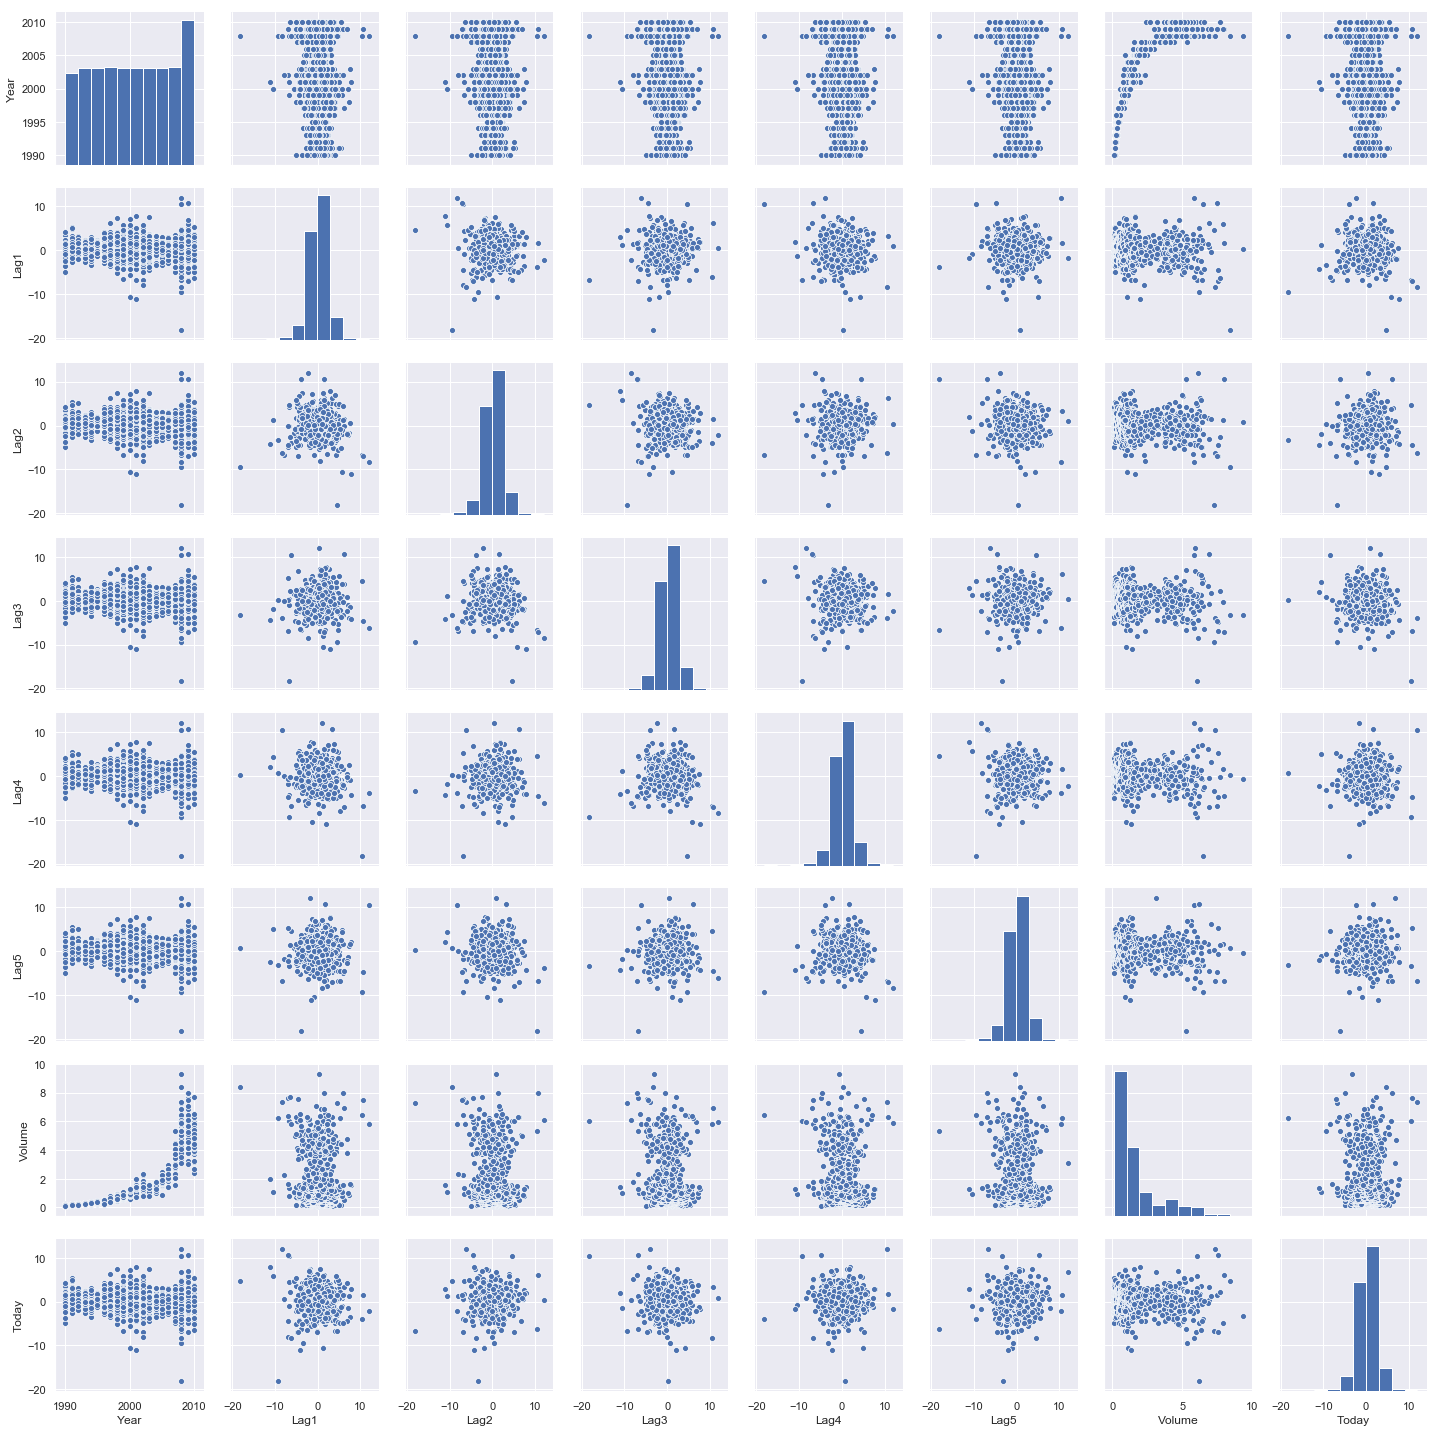

In [70]:
sns.pairplot(df)
plt.show()

In [71]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


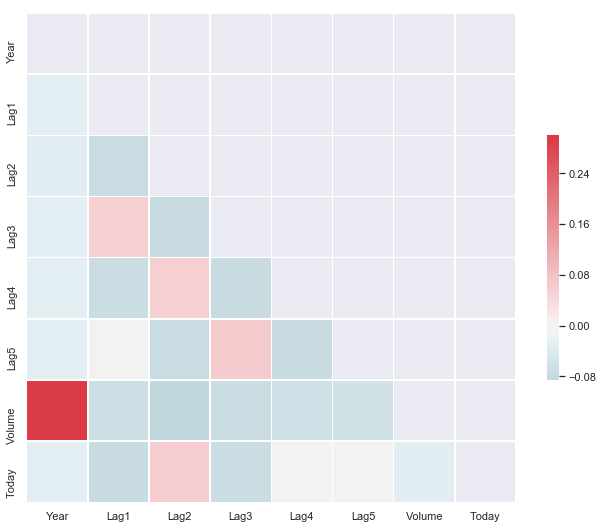

In [72]:
# seaborn heatmap correlation heatmap example
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [67]:
dfs = df.drop(columns=(['Year','Volume']))
dfs = dfs.cumsum()

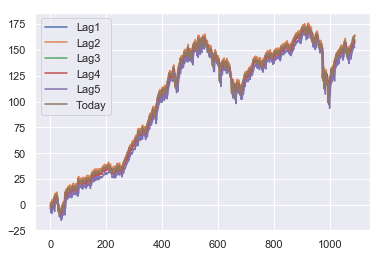

In [75]:
dfs.plot()
plt.legend(loc='best')
plt.show()

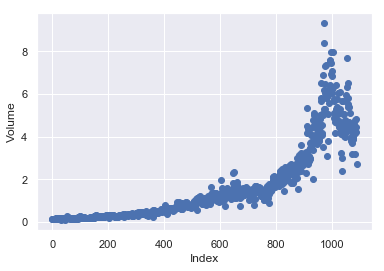

In [76]:
plt.scatter(df.index, df['Volume'])
plt.xlabel("Index")
plt.ylabel("Volume")
plt.show()

**(b)** Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

>Lag2 appears significant. p<0.05

In [77]:
# convert 'Direction' from 'Yes/No' to 0/1. For ease in modeling.
df['Direction_Up'] = np.where(df['Direction'] == 'Up', 1, 0)

In [78]:
glm = smf.logit('Direction_Up ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=df).fit()
glm.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.006580
Time:                        10:58:51   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

**(c)** Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

>Accuracy is 56%. The model predicts correct when the market moves Up, but misses alot when the market moves Down. FPR=89%. Maybe thresholding could help?

In [79]:
glm_probs = glm.predict()
glm_pred = np.where(glm_probs>.5, 'Up', 'Down')

pd.crosstab(glm_pred, df['Direction'], rownames=['Predicted'],
           colnames=['Actual'], margins=True)

Actual,Down,Up,All
Predicted,,,
Down,54,48,102
Up,430,557,987
All,484,605,1089


In [84]:
print("Accuracy: " + str((54+557)/1089))
print("Error rate: " + str(1-(54+557)/1089))
print("False positive rate FPR: ", str(430/(430+54)))

Accuracy: 0.5610651974288338
Error rate: 0.43893480257116624
False positive rate FPR:  0.8884297520661157


**(d)** Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [85]:
df.Year.value_counts()

2007    53
1996    53
2010    52
1999    52
1991    52
1992    52
1993    52
1994    52
1995    52
1997    52
1998    52
2000    52
2009    52
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2008    52
1990    47
Name: Year, dtype: int64

In [88]:
df_train = df.loc[df['Year'] <= 2008]
df_test = df.loc[df['Year'] > 2008]

print("Shape of train: " + str(df_train.shape))
print("Shape of test: " + str(df_test.shape))

Shape of train: (985, 10)
Shape of test: (104, 10)


In [109]:
glm = smf.logit('Direction_Up ~ Lag2', data=df_train).fit()
glm_probs = glm.predict(df_test) # predict on test set
glm_pred = np.where(glm_probs>.5, 'Up', 'Down') # threshold

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


In [110]:
conf_matrix = pd.crosstab(glm_pred, df_test['Direction'], rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Accuracy: " + str(accuracy))
print("Error rate: " + str(error_rate))
conf_matrix

Accuracy: 0.625
Error rate: 0.375


Actual,Down,Up,All
Predicted,,,
Down,9,5,14
Up,34,56,90
All,43,61,104


**(e)** Repeat (d) using LDA.

In [148]:
year_bool = df['Year'] < 2009
df['ones'] = 1 #adding 'ones' column bc sklearn requires a 2-dim array for fit() and predict()
x_train = df[year_bool][['ones', 'Lag2']].values
x_test = df[~year_bool][['ones', 'Lag2']].values
y_train = df[year_bool]['Direction'].values
y_test = df[~year_bool]['Direction'].values

In [149]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(985,)
(985, 2)
(104,)
(104, 2)


In [150]:
clf = LDA()
clf.fit(x_train, y_train)

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [138]:
conf_matrix = pd.crosstab(clf.predict(x_test), df_test['Direction'], rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Accuracy: " + str(accuracy))
print("Error rate: " + str(error_rate))
conf_matrix

Accuracy: 0.625
Error rate: 0.375


Actual,Down,Up,All
Predicted,,,
Down,9,5,14
Up,34,56,90
All,43,61,104


**(f)** Repeat (d) using QDA.

In [151]:
clf = QDA()
clf.fit(x_train, y_train)

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [153]:
pd.crosstab(clf.predict(x_test), df_test['Direction'], rownames=['Predicted'],
           colnames=['Actual'], margins=True)

/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/danielruiz/anaconda2/envs/gstore/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Actual,Down,Up,All
Predicted,,,
Down,43,61,104
All,43,61,104


**(g)** Repeat (d) using KNN with K = 1.

In [154]:
neigh = KNNc(n_neighbors=1)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [156]:
conf_matrix = pd.crosstab(neigh.predict(x_test), df_test['Direction'], rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Accuracy: " + str(accuracy))
print("Error rate: " + str(error_rate))
conf_matrix

Accuracy: 0.49038461538461536
Error rate: 0.5096153846153846


Actual,Down,Up,All
Predicted,,,
Down,21,31,52
Up,22,30,52
All,43,61,104


**(h)** Which of these methods appears to provide the best results on
this data?

> Logistic regression and LDA give the best (and same) test error performance.

**11.** In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

(a) Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [163]:
# In this data set missing values are encoded as '?' so we will need to
#  pass that to the `na_values` parameter.

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv'
                 , na_values='?')
df = df.dropna() # drop columns with NaN
print("Shape of dataframe: " + str(df.shape))
df.head()

Shape of dataframe: (392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [164]:
df['mpg01'] = np.where(df['mpg'] > df['mpg'].median(), 1, 0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


**(b)** Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

>Positively correlated with `mpg` (obvi). Negatively correlated with `cylinders`, `displacement`, `horsepower` and `weight`.

In [166]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


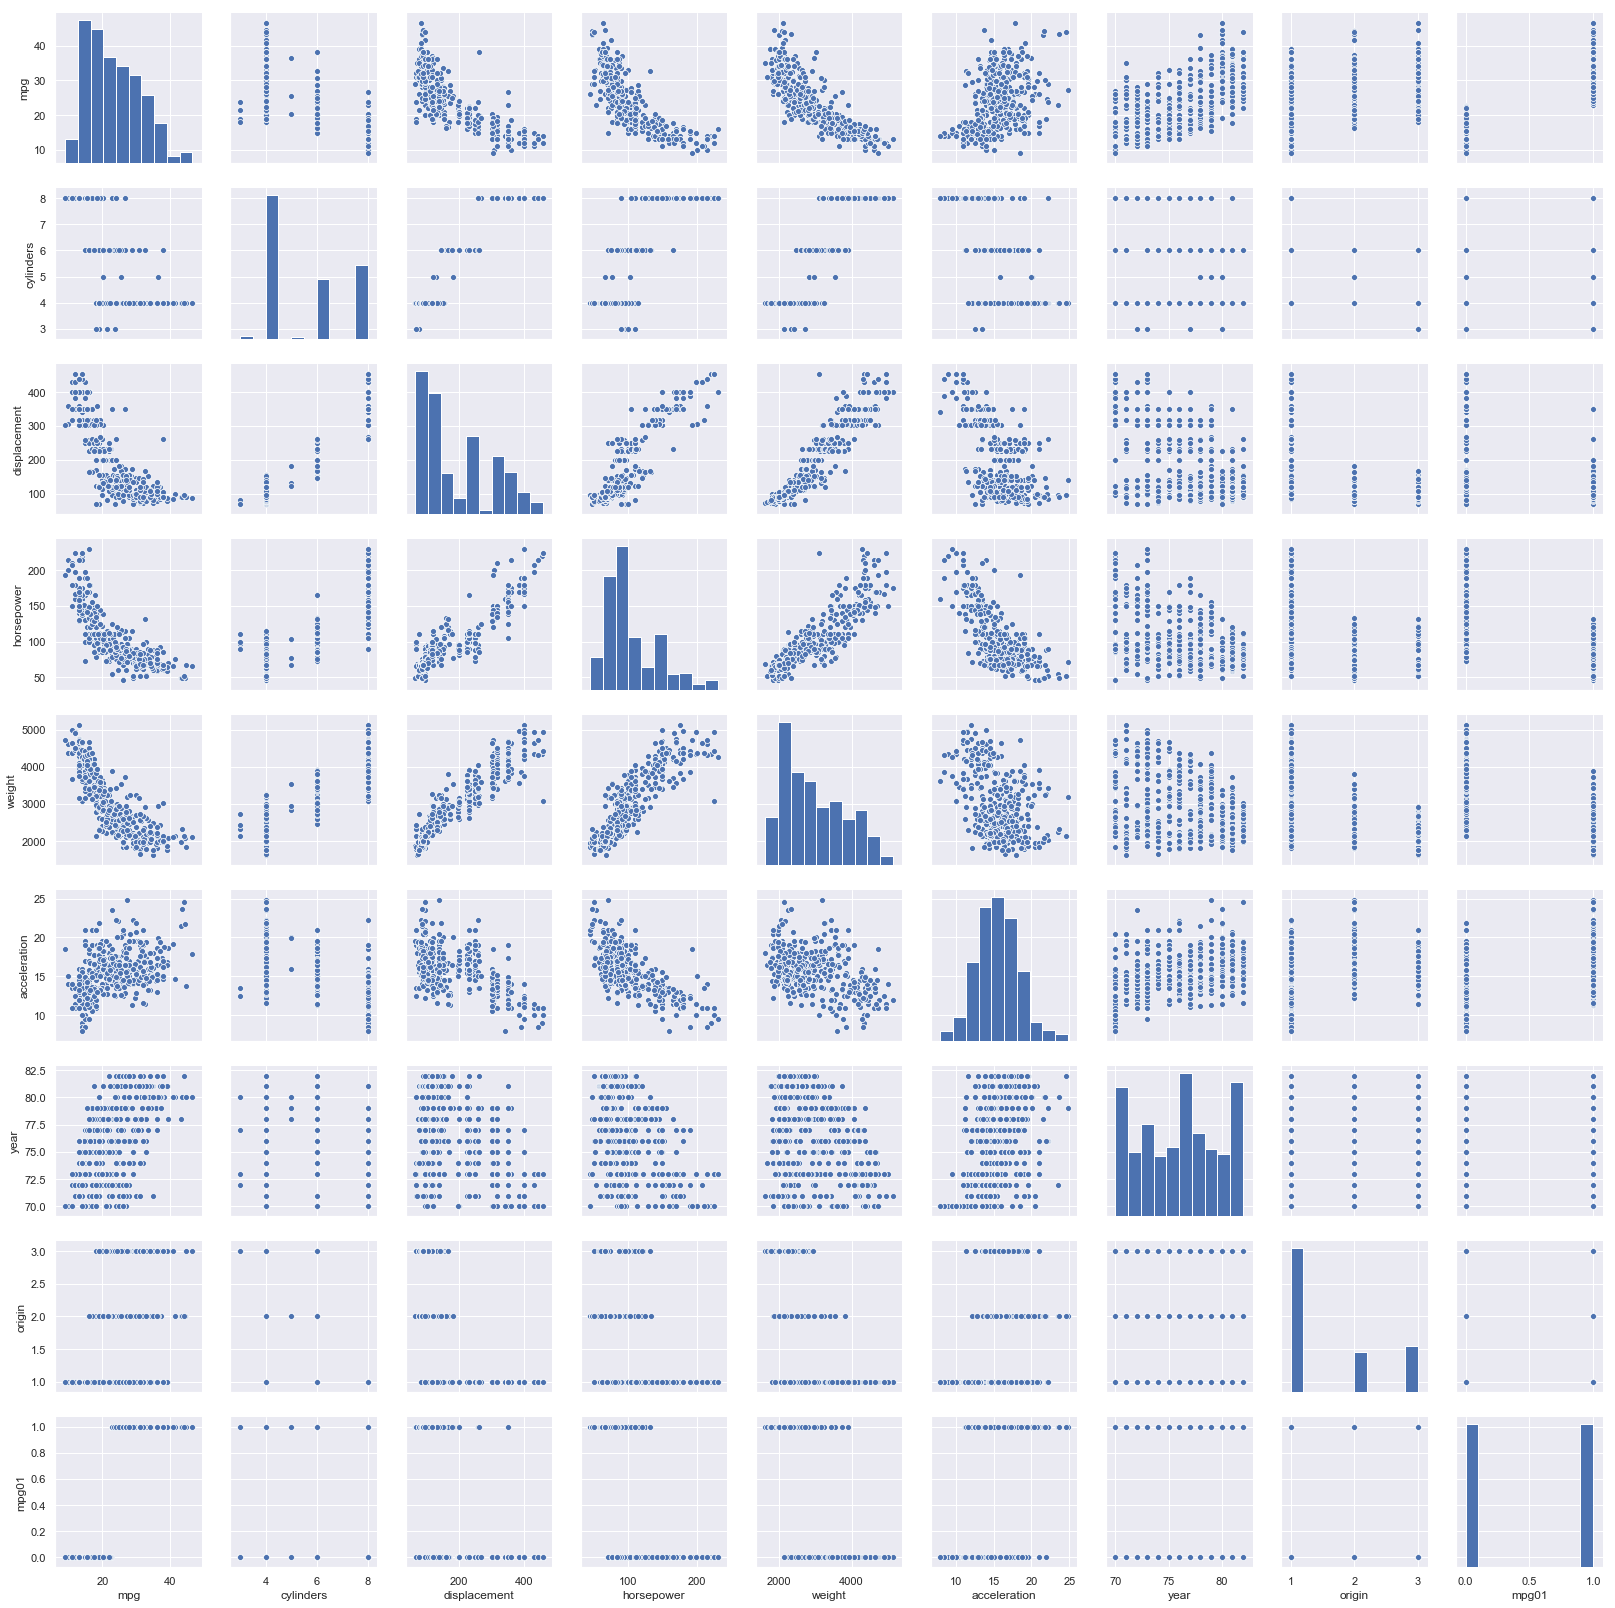

In [169]:
sns.pairplot(df)
plt.show()

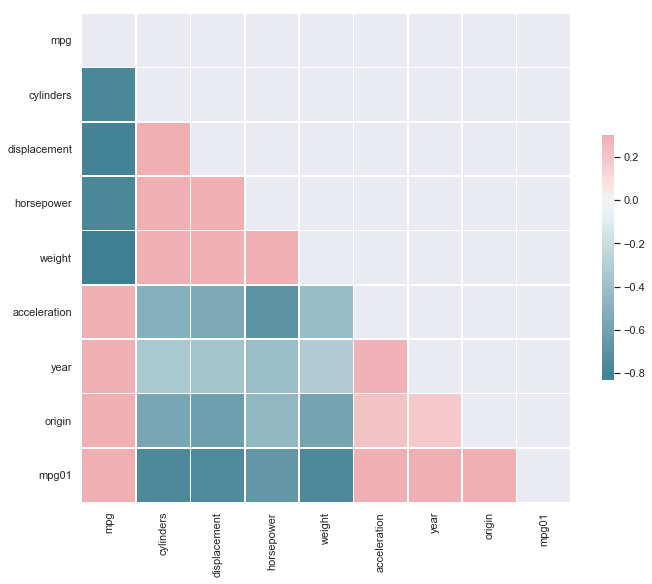

In [170]:
# seaborn heatmap correlation heatmap example
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

**(c)** Split the data into a training set and a test set.

In [187]:
# X = df.iloc[:,0:8].values # if you want all vars (other than 'mpg01')
#  if you do above, might want to not include 'mpg' since it's so correlated with 'mpg01'
X = df[['cylinders','displacement','horsepower','weight']].values
y = df['mpg01'].values
print(X.shape)
print(y.shape)

(392, 4)
(392,)


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [196]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294, 4)
(98, 4)
(294,)
(98,)


**(d)** Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [199]:
clf = LDA()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [205]:
conf_matrix = pd.crosstab(clf.predict(X_test), y_test, rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Test accuracy: " + str(accuracy))
print("Test error rate: " + str(error_rate))
conf_matrix

Test accuracy: 0.9285714285714286
Test error rate: 0.07142857142857142


Actual,0,1,All
Predicted,,,
0,49,2,51
1,5,42,47
All,54,44,98


**(e)** Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [206]:
clf = QDA()
clf.fit(X_train, y_train)

conf_matrix = pd.crosstab(clf.predict(X_test), y_test, rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Test accuracy: " + str(accuracy))
print("Test error rate: " + str(error_rate))
conf_matrix

Test accuracy: 0.9387755102040817
Test error rate: 0.061224489795918366


Actual,0,1,All
Predicted,,,
0,52,4,56
1,2,40,42
All,54,44,98


**(f)** Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [208]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

conf_matrix = pd.crosstab(clf.predict(X_test), y_test, rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Test accuracy: " + str(accuracy))
print("Test error rate: " + str(error_rate))
conf_matrix

Test accuracy: 0.8979591836734694
Test error rate: 0.10204081632653061


Actual,0,1,All
Predicted,,,
0,49,5,54
1,5,39,44
All,54,44,98


**(g)** Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [209]:
clf = KNNc(n_neighbors=1)
clf.fit(X_train, y_train)

conf_matrix = pd.crosstab(clf.predict(X_test), y_test, rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Test accuracy: " + str(accuracy))
print("Test error rate: " + str(error_rate))
conf_matrix

Test accuracy: 0.8775510204081632
Test error rate: 0.12244897959183673


Actual,0,1,All
Predicted,,,
0,47,5,52
1,7,39,46
All,54,44,98


In [213]:
for i in range(1, 51):
    clf = KNNc(n_neighbors=i)
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(i, accuracy))

With K=1 accuracy is 0.878
With K=2 accuracy is 0.857
With K=3 accuracy is 0.898
With K=4 accuracy is 0.898
With K=5 accuracy is 0.867
With K=6 accuracy is 0.888
With K=7 accuracy is 0.888
With K=8 accuracy is 0.908
With K=9 accuracy is 0.898
With K=10 accuracy is 0.898
With K=11 accuracy is 0.908
With K=12 accuracy is 0.908
With K=13 accuracy is 0.908
With K=14 accuracy is 0.908
With K=15 accuracy is 0.898
With K=16 accuracy is 0.898
With K=17 accuracy is 0.888
With K=18 accuracy is 0.918
With K=19 accuracy is 0.918
With K=20 accuracy is 0.918
With K=21 accuracy is 0.908
With K=22 accuracy is 0.908
With K=23 accuracy is 0.908
With K=24 accuracy is 0.918
With K=25 accuracy is 0.908
With K=26 accuracy is 0.918
With K=27 accuracy is 0.918
With K=28 accuracy is 0.918
With K=29 accuracy is 0.918
With K=30 accuracy is 0.918
With K=31 accuracy is 0.918
With K=32 accuracy is 0.918
With K=33 accuracy is 0.908
With K=34 accuracy is 0.908
With K=35 accuracy is 0.898
With K=36 accuracy is 0.908
W

**12.** This problem involves writing functions.

**(a)** Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 2^3 and print out the results.

In [218]:
def power():
    x = 2**3
    print(x)
    
power()

8


**(b) and (c)**

In [221]:
def power2(a,b):
    x = a**b
    print(x)
    
power2(3, 8)
power2(10, 3)
power2(8, 17)
power2(131, 3)

6561
1000
2251799813685248
2248091


**(d)**

In [223]:
def power3(a,b):
    result = a**b
    return(result)

**(e)**

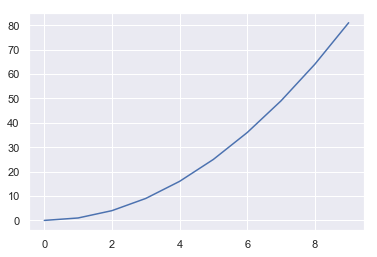

In [225]:
n = 10
plt.plot(range(n), [power3(x, 2) for x in range(n)])
plt.show()

**(f)**

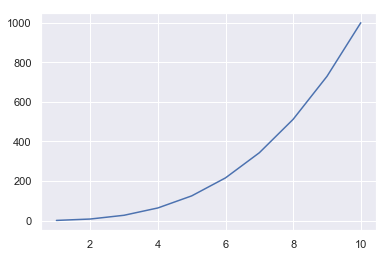

In [229]:
def PlotPower(x, a):
    plt.plot(x, [power3(x, a) for x in x])
    
PlotPower(range(1,11),3)

**13.** Using the `Boston` data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various sub- sets of the predictors. Describe your findings.

> KNN=1 performs best on the test set. It's ironic that a method described as **_nearest neighbors_** performs the best when we are evaluating models for housing/neighborhoods.

In [230]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [231]:
# create variable for above/below median crime rate
df['crim01'] = np.where(df['crim'] > df['crim'].median(), 1, 0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [232]:
X = df.iloc[:,1:-1].values
y = df['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [235]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [238]:
# Logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

conf_matrix = pd.crosstab(clf.predict(X_test), y_test, rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Test accuracy: " + str(accuracy))
print("Test error rate: " + str(error_rate))
conf_matrix

Test accuracy: 0.8740157480314961
Test error rate: 0.12598425196850394


Actual,0,1,All
Predicted,,,
0,56,12,68
1,4,55,59
All,60,67,127


In [239]:
# LDA
clf = LDA()
clf.fit(X_train, y_train)

conf_matrix = pd.crosstab(clf.predict(X_test), y_test, rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Test accuracy: " + str(accuracy))
print("Test error rate: " + str(error_rate))
conf_matrix

Test accuracy: 0.8582677165354331
Test error rate: 0.14173228346456693


Actual,0,1,All
Predicted,,,
0,57,15,72
1,3,52,55
All,60,67,127


In [240]:
# QDA
clf = QDA()
clf.fit(X_train, y_train)

conf_matrix = pd.crosstab(clf.predict(X_test), y_test, rownames=['Predicted'],
           colnames=['Actual'], margins=True)

TN = conf_matrix.iloc[0][0]
TP = conf_matrix.iloc[1][1]
FN = conf_matrix.iloc[0][1]
FP = conf_matrix.iloc[1][0]
ALL = conf_matrix.iloc[2][2]
accuracy = (TP+TN)/ALL
error_rate = (FP+FN)/ALL

print("Test accuracy: " + str(accuracy))
print("Test error rate: " + str(error_rate))
conf_matrix

Test accuracy: 0.905511811023622
Test error rate: 0.09448818897637795


Actual,0,1,All
Predicted,,,
0,59,11,70
1,1,56,57
All,60,67,127


In [241]:
# A bunch of KNN
for i in range(1, 51):
    clf = KNNc(n_neighbors=i)
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(i, accuracy))

With K=1 accuracy is 0.945
With K=2 accuracy is 0.937
With K=3 accuracy is 0.921
With K=4 accuracy is 0.921
With K=5 accuracy is 0.921
With K=6 accuracy is 0.921
With K=7 accuracy is 0.898
With K=8 accuracy is 0.882
With K=9 accuracy is 0.898
With K=10 accuracy is 0.874
With K=11 accuracy is 0.866
With K=12 accuracy is 0.827
With K=13 accuracy is 0.835
With K=14 accuracy is 0.819
With K=15 accuracy is 0.819
With K=16 accuracy is 0.819
With K=17 accuracy is 0.827
With K=18 accuracy is 0.827
With K=19 accuracy is 0.827
With K=20 accuracy is 0.827
With K=21 accuracy is 0.819
With K=22 accuracy is 0.819
With K=23 accuracy is 0.819
With K=24 accuracy is 0.819
With K=25 accuracy is 0.819
With K=26 accuracy is 0.819
With K=27 accuracy is 0.827
With K=28 accuracy is 0.819
With K=29 accuracy is 0.827
With K=30 accuracy is 0.835
With K=31 accuracy is 0.827
With K=32 accuracy is 0.827
With K=33 accuracy is 0.827
With K=34 accuracy is 0.827
With K=35 accuracy is 0.827
With K=36 accuracy is 0.835
W